# 합성곱 신경망을 사용한 이미지 분류

https://velog.io/@somnode/linux-tensorflow-gpu-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0

In [21]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [22]:
## 패션 MNIST 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)


In [23]:
## 합성곱 신경망 만들기

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))

model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

keras.utils.plot_model(model)

keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_10 (Dense)            (None, 100)              

In [24]:
## 모델 컴파일과 훈련

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20


UnimplementedError: Graph execution error:

Detected at node 'gradient_tape/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/UnsortedSegmentSum' defined at (most recent call last):
    File "C:\Users\solst\anaconda3\envs\py38\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\solst\anaconda3\envs\py38\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\solst\anaconda3\envs\py38\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\solst\anaconda3\envs\py38\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\solst\anaconda3\envs\py38\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\IPython\core\interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\IPython\core\interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\IPython\core\interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\solst\AppData\Local\Temp\ipykernel_3900\430842660.py", line 11, in <cell line: 11>
      history = model.fit(train_scaled, train_target, epochs=20,
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\keras\engine\training.py", line 893, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 537, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 590, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Users\solst\anaconda3\envs\py38\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 471, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/UnsortedSegmentSum'
Deterministic GPU implementation of unsorted segment reduction op not available.
	 [[{{node gradient_tape/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/UnsortedSegmentSum}}]] [Op:__inference_train_function_5515]

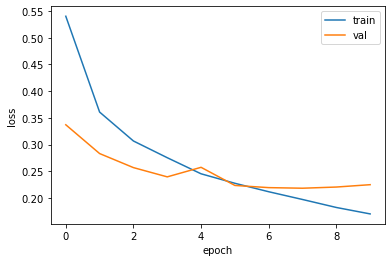

375/375 [==============================] - 0s 981us/step - loss: 0.2183 - accuracy: 0.9217


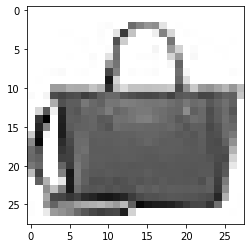

1/1 [==============================] - 0s 41ms/step
[[9.83498425e-15 1.14464634e-26 5.97949550e-18 2.83537372e-18
  1.19523284e-15 2.76382695e-16 1.79496009e-17 3.71620205e-15
  1.00000000e+00 3.87297080e-17]]


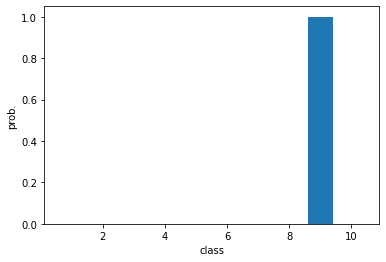

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

model.evaluate(val_scaled, val_target)

plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

preds = model.predict(val_scaled[0:1])
print(preds)

plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

가방
313/313 [==============================] - 0s 1ms/step - loss: 0.2363 - accuracy: 0.9164


[0.2363009750843048, 0.9164000153541565]